Test agapy with some of the functions written below. The analytic solution(s) are mentioned in the cells

In [1]:
import numpy as np
from agapy import Agapy
import matplotlib.pyplot as plt

## Functions

Run one of these functions and execute agapy

In [174]:
name = "Rossembrock"
a = 4
b = 100
def RB(X):
    x1,x2 = X[0],X[1]

    rosenbrock = np.log((a-x1)**2 + b*(x2-x1**2)**2)
    
    return rosenbrock

# Solution:
# (a,a**2)

bounds = np.array([[-100,100],
                  [-100,100]]) 

In [201]:
name = "Eggholder"
a = 5
b = 10
def egg(X):
    x1,x2 = X[0], X[1]
    
    huevo = -(x2+47)*np.sin(np.sqrt(abs(x2+(x1/2)+47))) - x1*np.sin(np.sqrt(abs(x1-(x2+47))))

    return huevo

# Solution:
# (512, 404.2319)

bounds = np.array([[-512,512],
                  [-512,512]]) 

In [152]:
name = "Cross-in-tray"

def cross(X):
    x,y= X[0], X[1]
    
    cruz = -0.0001*(abs(np.sin(x)*np.sin(y)*np.exp(abs(100-(np.sqrt(x**2+y**2)/np.pi )))) + 1)**0.1
    return cruz

# Solution:
# (1.34941, -1.34941)
# (1.34941, 1.34941)
# (-1.34941, 1.34941)
# (-1.34941, -1.34941)

bounds = np.array([[-10,10],
                  [-10,10]]) 


In [188]:
name = "Schaffer"

def schaffer(X):
    x,y = X[0], X[1]
    
    arriba = np.cos(np.sin(abs(x**2-y**2)))**2 - 0.5
    abajo = (1 + 0.001*(x**2 + y**2))**2
    
    sch = 0.5 + (arriba/abajo)
    
    return sch

# Solution:
# (0, 1.25313)
# (0,-1.25313)

bounds = np.array([[-100,100],
                  [-100,100]]) 

## Agapy

In [203]:
# Create instance
ag = Agapy(egg,     # the function to minimize
           bounds,  # The boundaries
           individuals=300, 
           fparents=.2,
           generations=300,
           save_evolution=True)


# Run
sides, fun, pop = ag.run()
print('Done!')

Done!


In [206]:
# Number of best solution(s)
n = 1

best = pop[-1][:n]
fbest = fun[-1][:n]
print(f"{n} best solution(s):\n {best}")
print(f"Function value(s):\n {fbest}")

1 best solution(s):
 [[511.97236885 403.75094163]]
Function value(s):
 [-959.31121398]


## Plot of parents at each generation

Text(0, 0.5, 'x2')

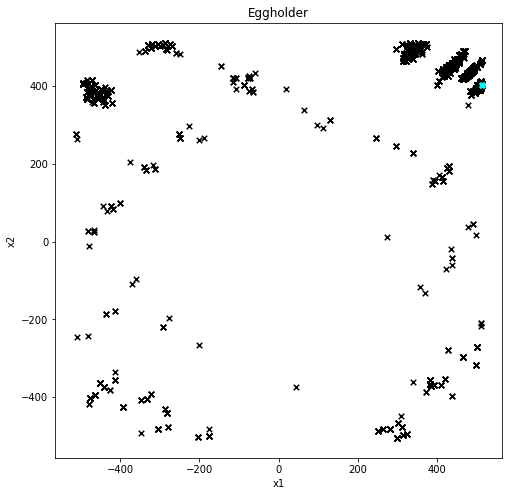

In [208]:
plt.figure(figsize=(8,8))
plt.title(name)
for ip, p in enumerate(pop):
    # All individuals
    #x = p.T[0]
    #y = p.T[1]
    #plt.scatter(x, y, c='k',s=10)
    
    # Parents
    x = p.T[0][:ag.nparents]
    y = p.T[1][:ag.nparents]
    plt.scatter(x, y, marker='x',c='k',s=30)
        

# The best solution
plt.scatter(best.T[0], best.T[1],marker='X',c='cyan')
plt.xlabel("x1")
plt.ylabel("x2")

## Plot of merith function minimization at each generation

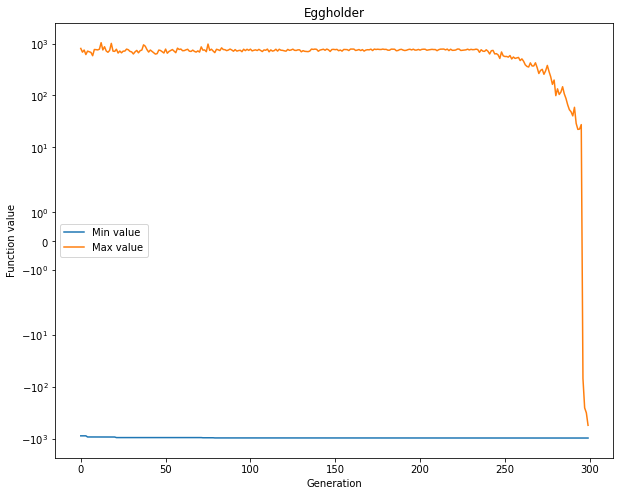

In [210]:
plt.figure(figsize=(10,8))
plt.title(name)

fmin,fmax= [],[]
for i, f in enumerate(fun):
    fmin.append(min(f))
    fmax.append(max(f))

plt.plot(range(i+1), fmin, label="Min value")
plt.plot(range(i+1), fmax, label="Max value")
plt.xlabel('Generation')
plt.ylabel('Function value')
plt.yscale('symlog')
plt.legend()